In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
sp.init_printing() 
import warnings
warnings.filterwarnings("ignore")
%matplotlib widget

sp.var('s, t')

## Goals and Commands

#### Goals
1. Visualizing solution to homogeneous and non-homogeneous equations
2. Determining linear independence of vectors


#### Commands
1. Few minor commands to beautify plotting
2. Nullspace method
3. zip
4. wireframe

Before doing this set it might be helpful to look through the set on Chapter 1.1-1.4

We will start with a simple example. 

#### Example

Suppose $A=\begin{bmatrix} 1 & 1 \\ 2 & 5 \end{bmatrix}$, $\bf{b_1}=\begin{bmatrix} 1 \\ 2  \end{bmatrix}$ and $\bf{b_2}=\begin{bmatrix} 0 \\ -2  \end{bmatrix}$. Solve and graph solutions for $A\bf{x}=\bf{0}$, $A\bf{x}=\bf{b_1}$ and $A\bf{x}=\bf{b_2}$.

#### Solution

In [2]:
A=np.array([[1,1],[2,5]])
b0,b1,b2=np.array([0,0]),np.array([1,2]), np.array([0,-2])
x0=np.linalg.solve(A,b0)
x1=np.linalg.solve(A,b1)
x2=np.linalg.solve(A,b2)
print(x0,x1,x2)

[ 0. -0.] [ 1. -0.] [ 0.66666667 -0.66666667]


We can see homogeneous system has only trivial solution, and the non-homogeneous systems are consistent and therefore have only one solution as well.

Let's plot them.

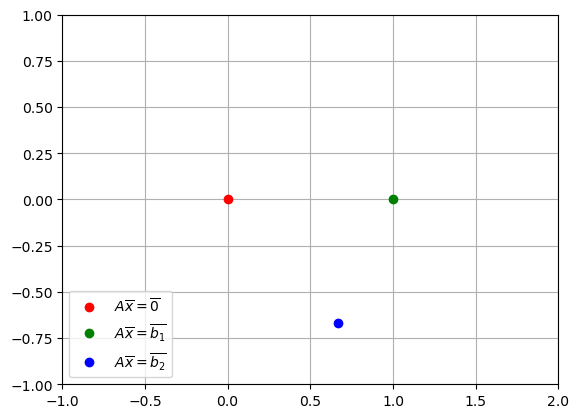

In [3]:
plt.axis([-1, 2, -1, 1])
plt.plot(x0[0],x0[1],'ro',label='$A\overline{x}=\overline{0}$')  
plt.plot(x1[0],x1[1],'go',label='$A\overline{x}=\overline{b_1}$')  
plt.plot(x2[0],x2[1],'bo',label='$A\overline{x}=\overline{b_2}$')  

plt.legend(loc='lower left')

plt.grid()
plt.show()

#### End of Solution

Let's look at bit more interesting problem.

#### Example

Suppose $A=\begin{bmatrix} 1 & 1 & 2\\ 2 & 5 & 0\\4 & 7 & 4\end{bmatrix}$, $\bf{b_1}=\begin{bmatrix} 1 \\ 2 \\1 \end{bmatrix}$ and $\bf{b_2}=\begin{bmatrix} 0 \\ -2 \\ -2 \end{bmatrix}$. Solve and graph solutions for $A\bf{x}=\bf{0}$, $A\bf{x}=\bf{b_1}$ and $A\bf{x}=\bf{b_2}$.

#### Solution

Let's just do the same thing as in the previous example

In [4]:
A=np.array([[1,1,2],[2,5,0],[4,7,4]])
b0,b1,b2=np.array([0,0,0]),np.array([1,2,1]), np.array([0,-2,-2])
x0=np.linalg.solve(A,b0)
x1=np.linalg.solve(A,b1)
x2=np.linalg.solve(A,b2)
print(x0,x1,x2)

LinAlgError: Singular matrix

It didn't work!!! We can see "Singular matrix" as our error. What it means is that at least one equation has no solution or has more than one solution. (Reminder: commands `solve` and `linalg.solve` work only if there is a unique solution.) We really should have checked for that first. Let's try this again using SymPy and slower.

In [8]:
A=sp.Matrix(A)
b0,b1,b2=sp.Matrix(b0),sp.Matrix(b1),sp.Matrix(b2)
A.rref()

⎛⎡1  0  10/3⎤        ⎞
⎜⎢          ⎥        ⎟
⎜⎢0  1  -4/3⎥, (0, 1)⎟
⎜⎢          ⎥        ⎟
⎝⎣0  0   0  ⎦        ⎠

OK, so now we see that we have one free variable, so our solutions, if they exists, will be lines. Lets get augmented matrix for each equation and row reduce them to RREF

In [9]:
A.row_join(b0).rref()[0]

⎡1  0  10/3  0⎤
⎢             ⎥
⎢0  1  -4/3  0⎥
⎢             ⎥
⎣0  0   0    0⎦

In [10]:
A.row_join(b1).rref()[0]

⎡1  0  10/3  0⎤
⎢             ⎥
⎢0  1  -4/3  0⎥
⎢             ⎥
⎣0  0   0    1⎦

In [11]:
A.row_join(b2).rref()[0]

⎡1  0  10/3  2/3 ⎤
⎢                ⎥
⎢0  1  -4/3  -2/3⎥
⎢                ⎥
⎣0  0   0     0  ⎦

We can see that first equation has solution of the form ${\bf{x}}= x_3\begin{bmatrix} -10/3 \\ 4/3 \\ 1 \end{bmatrix}$.

The second equation has no solution.

The third equation has solution of the form ${\bf{x}}= x_3\begin{bmatrix} -10/3 \\ 4/3 \\ 1 \end{bmatrix}+ \begin{bmatrix} 2/3 \\ -2/3 \\ 0 \end{bmatrix}$

So we are in the case with infintelly many solution. We are finally going to introduce a way to solve such equations. We will use something called a Null-space. We will discuss what that is later in the course, but for now all we need to know is that it gives us a set of vectors that span a solution set for homogenuous system. This is exactly the vectors you get when you solve homogenous system by hand. 

Since we generally want to express these solution with variable, we will use SymPy. 

So, first homogeneous case:

In [12]:
A.nullspace()

⎡⎡-10/3⎤⎤
⎢⎢     ⎥⎥
⎢⎢ 4/3 ⎥⎥
⎢⎢     ⎥⎥
⎣⎣  1  ⎦⎦

In [13]:
sol1=A.nullspace()[0]*t     # t was introduced at the top as SymPy variable
sol1

⎡-10⋅t ⎤
⎢──────⎥
⎢  3   ⎥
⎢      ⎥
⎢ 4⋅t  ⎥
⎢ ───  ⎥
⎢  3   ⎥
⎢      ⎥
⎣  t   ⎦

For non-homogenuous case, we will use above solution plus particular solution from RREF

In [14]:
sol2=sol1+A.row_join(b2).rref()[0][:,3]
sol2

⎡2   10⋅t⎤
⎢─ - ────⎥
⎢3    3  ⎥
⎢        ⎥
⎢4⋅t   2 ⎥
⎢─── - ─ ⎥
⎢ 3    3 ⎥
⎢        ⎥
⎣   t    ⎦

We can also evaluate if needed and even round of answers.

In [15]:
sol2.subs(t,1)

⎡-8/3⎤
⎢    ⎥
⎢2/3 ⎥
⎢    ⎥
⎣ 1  ⎦

In [16]:
sol2.subs(t,1).evalf(3)   # 3 here is how many significant digits we take

⎡-2.67⎤
⎢     ⎥
⎢0.667⎥
⎢     ⎥
⎣ 1.0 ⎦

Finally, let's plot them. (Clearly we can't plot the second case)

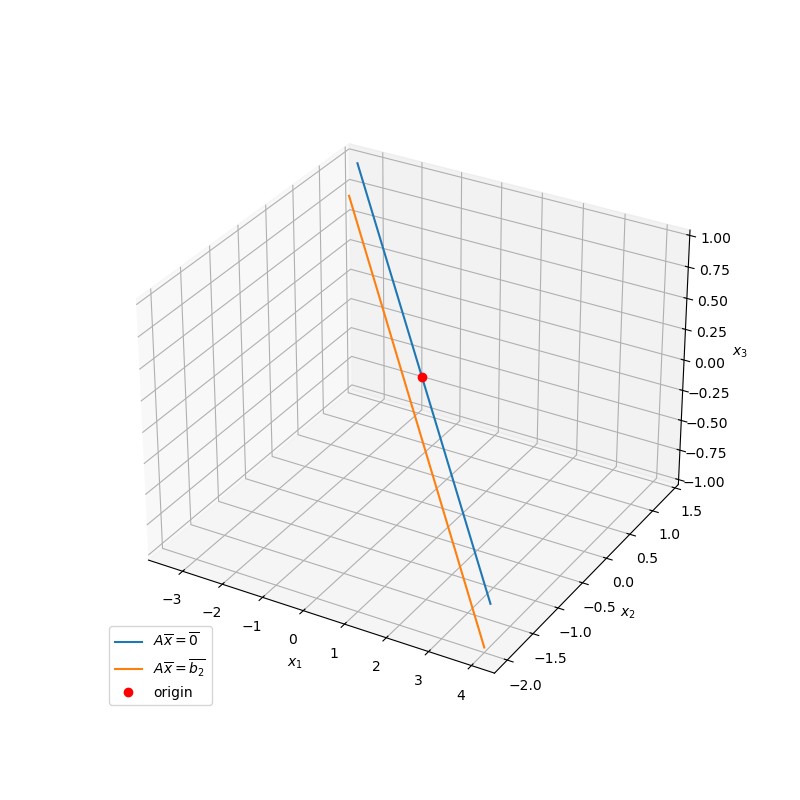

In [5]:

x3=np.linspace(-1,1,100)  # free variable

# first equation
x1=-10/3*x3
x2=4/3*x3

# second equation
y1=-10/3*x3+2/3
y2=4/3*x3-2/3

fig = plt.figure(figsize=(8,8))
ax=fig.add_subplot(projection='3d')

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')
ax.zaxis.set_rotate_label(False)
ax.yaxis.set_rotate_label(False)
ax.xaxis.set_rotate_label(False)

ax.plot(x1, x2, x3, label="$A\overline{x}=\overline{0}$")
ax.plot(y1, y2, x3, label="$A\overline{x}=\overline{b_2}$")
ax.plot(0,0,0, 'ro', label='origin')
plt.legend(loc='lower left')
plt.show()

What if we have more than 1 free variable?

#### Example
Let  $A=\begin{bmatrix} 1 & 2 & 3 \\ 1 & 2 & 3 \\ 2 & 4 & 6 \end{bmatrix}$. Solve $A\bf{x}=\bf{0}$

In [2]:
A=sp.Matrix([[1,2,3],[1,2,3],[2,4,6]])
A.rref()

⎛⎡1  2  3⎤      ⎞
⎜⎢       ⎥      ⎟
⎜⎢0  0  0⎥, (0,)⎟
⎜⎢       ⎥      ⎟
⎝⎣0  0  0⎦      ⎠

In [20]:
A.nullspace()


⎡⎡-2⎤  ⎡-3⎤⎤
⎢⎢  ⎥  ⎢  ⎥⎥
⎢⎢1 ⎥, ⎢0 ⎥⎥
⎢⎢  ⎥  ⎢  ⎥⎥
⎣⎣0 ⎦  ⎣1 ⎦⎦

In [21]:
sol = A.nullspace()[0]*t+A.nullspace()[1]*s    # both t and s are SymPy variables.
sol

⎡-3⋅s - 2⋅t⎤
⎢          ⎥
⎢    t     ⎥
⎢          ⎥
⎣    s     ⎦

## Linear Independence

Determining linear independence of vectors is quite simple. We can see it by looking at RREF of a matrix whose columns are given vectors.

#### Example

Determine whether $\bf{v_1}=\begin{bmatrix} 1 \\ 2 \\ 1 \end{bmatrix}$, $\bf{v_2}=\begin{bmatrix} 4 \\ 4 \\ -6 \end{bmatrix}$ and $\bf{v_3}=\begin{bmatrix} 0 \\ 2 \\ 5 \end{bmatrix}$ are linearly independent. 

#### Solution

Let's created a matrix out of the given vectors. It is a bit easier to have each vector as a row and then take transpose.

In [3]:
v1, v2, v3 = np.array([1,2,1]),np.array([4,4,-6]),np.array([0,2,5])
A=sp.Matrix([v1,v2,v3])
A.T.rref()

⎛⎡1  0   2  ⎤        ⎞
⎜⎢          ⎥        ⎟
⎜⎢0  1  -1/2⎥, (0, 1)⎟
⎜⎢          ⎥        ⎟
⎝⎣0  0   0  ⎦        ⎠

Since we have a free variable, these vectors are not linearly independent. In fact, if we visualize this, we can see, that $\bf{v_3}$ lies in the plane spanned by $\bf{v_1}$ and $\bf{v_2}$. Note, pay attention to how we created a plane spanned by v1 and v2.

The rest of this file is optional, but still try to go through it to see visualization of linear independence. Also, take note of a very useful command `zip`.

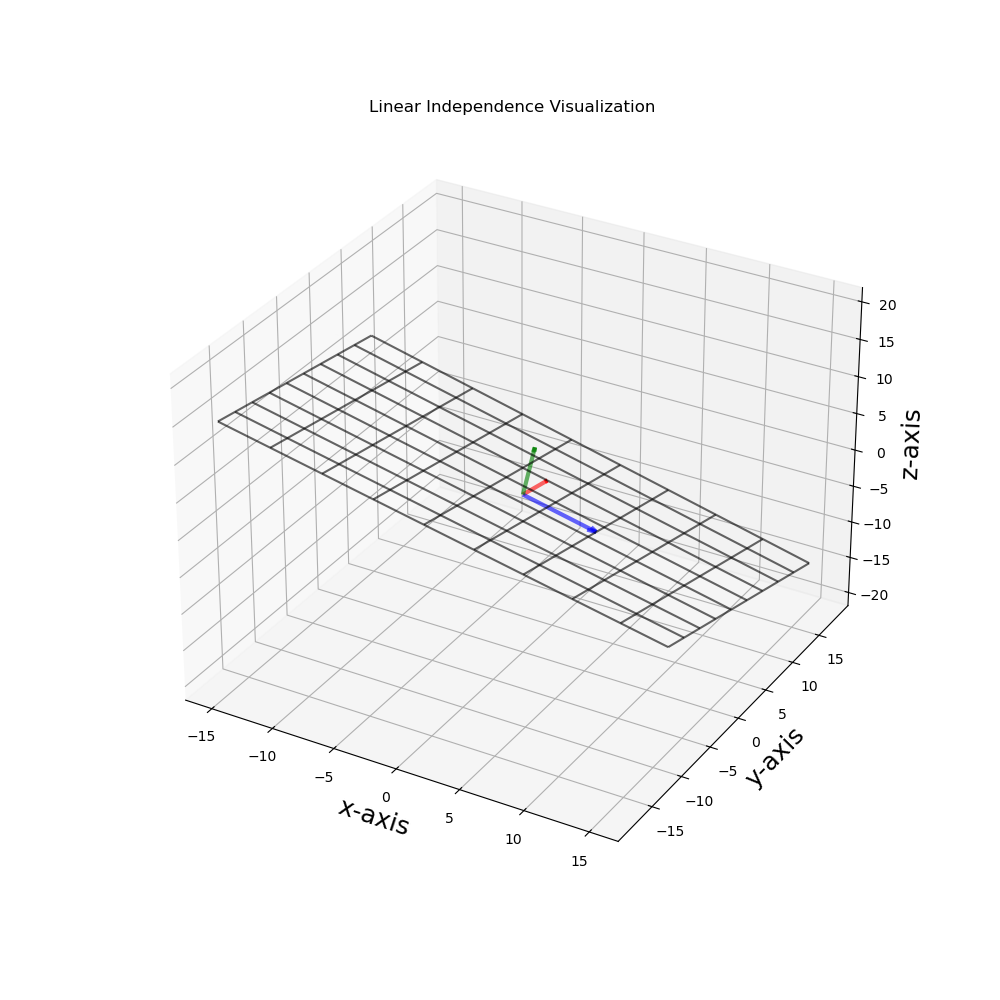

In [4]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection='3d')


# create a plane spanned by v1 and v2
s = np.linspace(-3, 3, 10)
t = np.linspace(-3, 3, 10)
S, T = np.meshgrid(s, t)

X = S+4*T
Y = 2*S+4*T
Z = S-6*T
ax.plot_wireframe(X, Y, Z, linewidth = 1.5, color = 'k', alpha = .6)


# Plot the vectors.
# We are going to use a very useful python command zip to arrange all coordinates in separate lists.
# It allows us either skip another loop and/or not specify each value separately. 
# Reminder, that in A, each row (not column) is one of or vectors.

zeros=sp.zeros(3)
veccoord = np.array(zeros.row_join(A))
colors = ['r','b','g']

for i in range(veccoord.shape[0]):
    X, Y, Z, U, V, W = zip(veccoord[i,:])
    ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = colors[i],
              arrow_length_ratio = .1, 
              linestyles = 'solid',linewidths = 3, alpha = .6)

ax.set_title('Linear Independence Visualization')

ax.set_xlabel('x-axis', size = 18)
ax.set_ylabel('y-axis', size = 18)
ax.set_zlabel('z-axis', size = 18)

plt.show()

Rotate the figure and you will see that all 3 vectors lie in the same plane.
#### End of solution

Next Example is almost the same, but vectors will be linearly independent. We will quickly check RREF and then use two of the vectors to create a plane and see that the third vector is not in that plane.

#### Example

Repeat the problem with following vectors: 
$\bf{v_1}=\begin{bmatrix} 1 \\ 2 \\ 1 \end{bmatrix}$, $\bf{v_2}=\begin{bmatrix} 2 \\ 2 \\ -3 \end{bmatrix}$ and $\bf{v_3}=\begin{bmatrix} -6 \\ 2 \\ 1 \end{bmatrix}$

In [9]:
v1, v2, v3 = np.array([1,2,1]),np.array([2,2,-3]),np.array([-6,2,1])
A=sp.Matrix([v1,v2,v3])
A.T.rref()

⎛⎡1  0  0⎤           ⎞
⎜⎢       ⎥           ⎟
⎜⎢0  1  0⎥, (0, 1, 2)⎟
⎜⎢       ⎥           ⎟
⎝⎣0  0  1⎦           ⎠

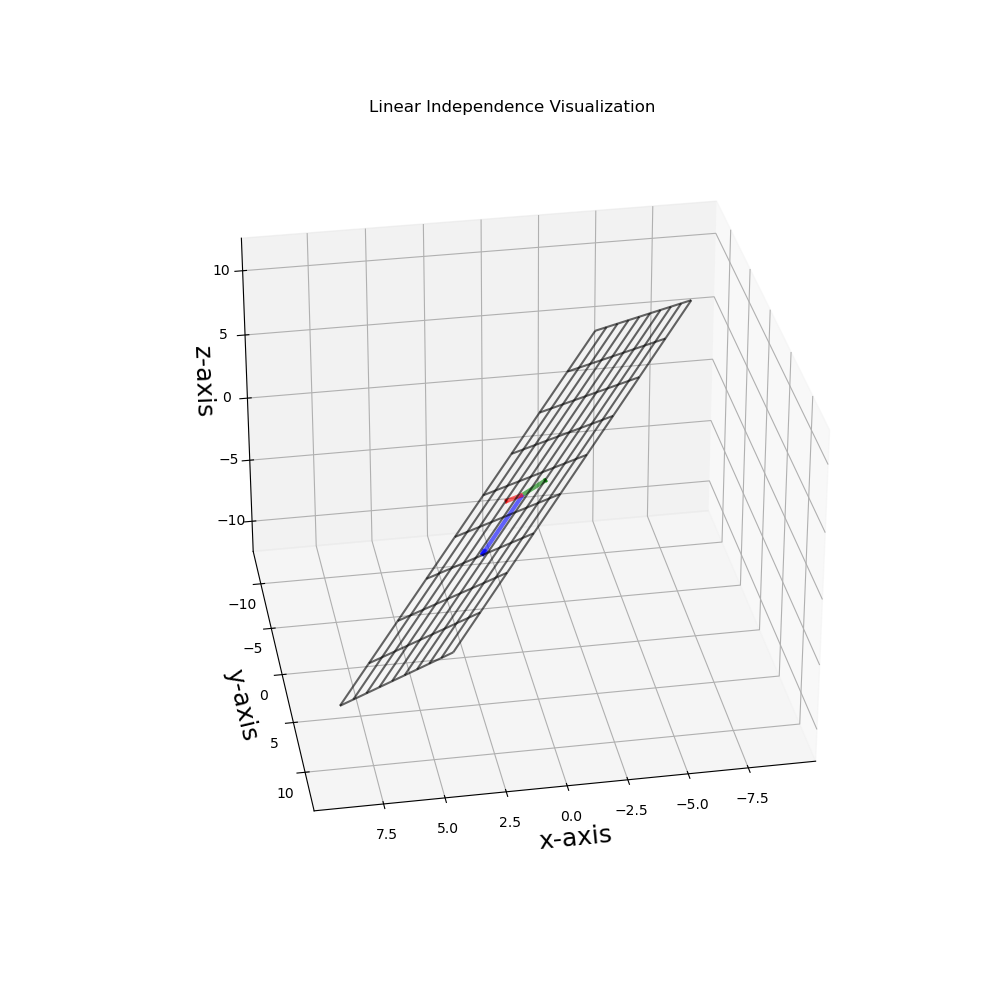

In [12]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection='3d')


# create a plane spanned by v1 and v2
s = np.linspace(-3, 3, 10)
t = np.linspace(-3, 3, 10)
S, T = np.meshgrid(s, t)

X = S+2*T
Y = 2*S+2*T
Z = S-3*T
ax.plot_wireframe(X, Y, Z, linewidth = 1.5, color = 'k', alpha = .6)


# Plot the vectors.

zeros=sp.zeros(3)
veccoord = np.array(zeros.row_join(A))
colors = ['r','b','g']

for i in range(veccoord.shape[0]):
    X, Y, Z, U, V, W = zip(veccoord[i,:])
    ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = colors[i],
              arrow_length_ratio = .1, 
              linestyles = 'solid',linewidths = 3, alpha = .6)

ax.set_title('Linear Independence Visualization')

ax.set_xlabel('x-axis', size = 18)
ax.set_ylabel('y-axis', size = 18)
ax.set_zlabel('z-axis', size = 18)

ax.view_init(azim=80)
plt.show()

Again, rotate the figure to see linear independence

#### End of example